In [1]:
import textract
#from nltk import word_tokenize
import os
import numpy as np
import sys
import pandas as pd
import re
#import shutil
#import time
#import pickle
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
##preprocess data
data_path = '/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA'
#folders = os.listdir(data_path)
folders = ['java', 'c++', 'python', 'kernel']
#print(folders)
data = []
labels = []
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    print(folder_path)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        text = " ".join(re.split("\W+", textract.process(file_path).decode('utf-8')))
        data.append(text)
        labels.append(folder)
#train_data, test_data, train_label, test_label = train_test_split(data, label, shuffle=True)        

/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/java
/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/c++
/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/python
/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/kernel


In [3]:
##convert text to number
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', 
                        stop_words='english')
train_data, test_data, train_label, test_label = train_test_split(data, labels, shuffle=True)
train_feature_matrix = tfidf.fit_transform(train_data).toarray()
test_feature_matrix = tfidf.transform(test_data).toarray()
print(train_feature_matrix.shape)
print(test_feature_matrix.shape)

(1627, 35722)
(543, 35722)


In [4]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC
#from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import BernoulliRBM
#from sklearn.neural_network import MLPRegressor

#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#model = GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=0, verbose=2)
#model = MLPClassifier(alpha=1, verbose=2)
#model = MLPRegressor(verbose=2)
#model = GaussianProcessClassifier(1.0 * RBF(1.0))
#model = DecisionTreeClassifier(max_depth=5)
#model = AdaBoostClassifier()
#model = QuadraticDiscriminantAnalysis()
model = LogisticRegression(verbose=1)

model.fit(train_feature_matrix, train_label)
acc = model.score(test_feature_matrix, test_label)
print((model.__class__.__name__, acc))


[LibLinear]('LogisticRegression', 0.7476979742173112)


In [5]:
dir(model)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [11]:
model.param_grid

AttributeError: 'LogisticRegression' object has no attribute 'param_grid'

In [ ]:
model_acc = [('GradientBoostingClassifier', 0.9023941068139963), ('MLPClassifier', 0.7550644567219152), 
            ('GaussianProcessClassifier', 0.852670349907919), ('AdaBoostClassifier', 0.6077348066298343)]

In [11]:
import pickle
data_save = {'train_data':train_feature_matrix, 'test_data':test_feature_matrix, 'train_label':train_label, 'text_label':test_label }
file = open('/home/sohail/Desktop/DEskTop/resume_classification/data.pkl', 'wb')
pickle.dump(data_save, file)
file.close()

In [27]:
##model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=0)
# model.fit(feature_matrix,train_label)
# test_data_mat = tfidf.transform(test_data).toarray()
# model.score(test_data_mat, test_label)
acc = cross_val_score(model, feature_matrix, labels, scoring='accuracy', cv=5)

In [29]:
np.mean(acc)

0.7456295367199643

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    LinearSVC(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, feature_matrix, labels, scoring='accuracy', cv=CV)
  print(accuracies)  
  entries.append((model_name, np.mean(accuracies)))  
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
#cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
cv_df                 

[0.82298851 0.78390805 0.85057471 0.80138568 0.78472222]
[0.58390805 0.58390805 0.58390805 0.58660508 0.58796296]
[0.88965517 0.85287356 0.91264368 0.91685912 0.91666667]
[0.5908046  0.58390805 0.5908046  0.59815242 0.59490741]
[0.75402299 0.71954023 0.75862069 0.74364896 0.75231481]
[0.88965517 0.84367816 0.86436782 0.86143187 0.87962963]


,model_name,accuracy
0,DecisionTreeClassifier,0.808716
1,RandomForestClassifier,0.585258
2,GradientBoostingClassifier,0.897740
3,MultinomialNB,0.591715
4,LogisticRegression,0.745630
5,LinearSVC,0.867753


In [45]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.583908
1,RandomForestClassifier,1,0.583908
2,RandomForestClassifier,2,0.583908
3,RandomForestClassifier,3,0.586605
4,RandomForestClassifier,4,0.587963
5,MultinomialNB,0,0.590805
6,MultinomialNB,1,0.583908
7,MultinomialNB,2,0.590805
8,MultinomialNB,3,0.598152
9,MultinomialNB,4,0.594907


In [4]:
import pandas as pd
acc = [(0, 'DecisionTreeClassifier', 0.808716),(1, 'RandomForestClassifier', 0.585258), 
        (2, 'GradientBoostingClassifier', 0.897740), 
         (3, 'MultinomialNB', 0.591715), (4, 'LogisticRegression', 0.745630), (5, 'LinearSVC', 0.867753) ]
df_acc = pd.DataFrame(acc, columns=['index', 'model', 'accuracy'])
df_acc

,index,model,accuracy
0,0,DecisionTreeClassifier,0.808716
1,1,RandomForestClassifier,0.585258
2,2,GradientBoostingClassifier,0.897740
3,3,MultinomialNB,0.591715
4,4,LogisticRegression,0.745630
5,5,LinearSVC,0.867753


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score

models = [
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    #DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()
]
CV = 5
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, train_feature_matrix, labels, scoring='accuracy', cv=CV)
  print(accuracies)  
  entries.append((model_name, np.mean(accuracies)))  
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
#cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df1 = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
cv_df1

In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

train_data, test_data, train_label, test_label = train_test_split(data, label, shuffle=True)

model = [
    BernoulliRBM(),
    MLPClassifier(alpha=1),
    MLPRegressor()
]

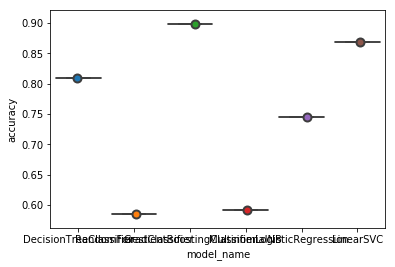

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [38]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.745630
MultinomialNB             0.591715
RandomForestClassifier    0.585258
Name: accuracy, dtype: float64

In [6]:
##prediction
predict_data_path = '/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/'
#folders = os.listdir(data_path)

for folder in folders:
    predict_data = []
    predict_label = []
    folder_path = os.path.join(predict_data_path, folder)
    print(folder_path)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        text = " ".join(re.split("\W+", textract.process(file_path).decode('utf-8')))
        predict_data.append(text)
        predict_label.append(folder)
        
    predict_feature_matrix = tfidf.transform(predict_data).toarray()
    print(predict_feature_matrix.shape)
    score = model.score(predict_feature_matrix, predict_label)
    print("accuracy of "+folder+" data is: {}".format(score))

/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/java
(1270, 34357)
accuracy of java data is: 0.9992125984251968
/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/c++
(243, 34357)
accuracy of c++ data is: 0.5390946502057613
/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/python
(93, 34357)
accuracy of python data is: 0.053763440860215055
/home/sohail/Desktop/DEskTop/resume_classification/RESUME_DATA/kernel
(564, 34357)
accuracy of kernel data is: 0.6861702127659575


In [19]:
data_path = '/home/sohail/Desktop/DEskTop/resume_classification/downloaded_resumes'
import os
fol_path = os.path.join(data_path, 'python')
l = os.listdir(fol_path)
print(l)
x = tfidf.transform([" ".join(re.split("\W+", textract.process(os.path.join(fol_path, l[1])).decode('utf-8')))]).toarray()
model.predict(x)

['aakash-gupta.pdf', 'Jagmohan-Solanki.pdf', 'Rushikesh-Deshmukh.pdf', 'P.-Sivaiah.pdf', 'Anusha-Kallepalli.pdf', 'S.-Kumari.pdf', 'Anshul-Jain.pdf', 'H.J.-Chaitra.pdf', 'Veeresh-NB.pdf', 'Prajeesh-Nair.pdf', 'MaheswaraRao-Kalyanapu.pdf', 'abhijeet-mote.pdf', 'Ravi-Teja.pdf', 'Bonny-Bon.pdf', 'Nethaji.-Muliki.pdf']


array(['java'], dtype='<U6')

In [8]:
# p = os.path.join(predict_data_path, 'java')
# l = os.listdir(p)
# fp = os.path.join(p, l[0])
# fp1 = os.path.join(data_path, 'c++')
# fp2 = os.path.join(fp1, os.listdir(fp1)[0])
# print(fp2)
# data = " ".join(re.split("\W+", textract.process(fp2).decode('utf-8').lower()))
# #x = tfidf.fit([data])
# y = tfidf.transform([data]).toarray()
# model.predict(y)

In [39]:
##model fitting
#from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
#model = LogisticRegression(random_state=0)
model = MLPClassifier(alpha=1)
train_data, test_data, train_label, test_label = train_test_split(feature_matrix, label, shuffle=True)
model.fit(train_data,train_label)
#test_data_mat = tfidf.transform(test_data).toarray()
predict_label = model.predict(test_data)

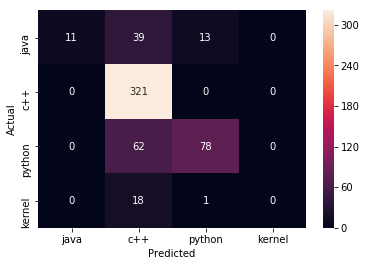

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(test_label, predict_label)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=folders, yticklabels=folders)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
conf_mat
model.score(test_data, test_label)

0.7550644567219152